# Conjunto de ejercicios
## Ejercicio 5
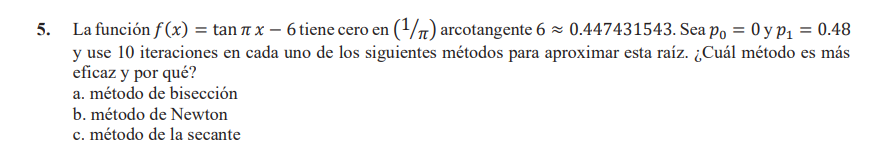

In [3]:
import numpy as np
from scipy.optimize import newton

# --------------------------------------
# Definir la función y su derivada
# --------------------------------------
def f(x):
    return np.tan(np.pi * x) - 6

def df(x):
    cos_val = np.cos(np.pi * x)
    if np.isclose(cos_val, 0):
        raise ZeroDivisionError("Derivada indefinida (cos(πx) = 0)")
    return np.pi / (cos_val**2)

# --------------------------------------
# Método de Bisección
# --------------------------------------
def biseccion(f, a, b, n_iter):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    for _ in range(n_iter):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# --------------------------------------
# Método de Newton personalizado
# --------------------------------------
def newton_custom(f, df, x0, n_iter):
    x = x0
    for _ in range(n_iter):
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Derivada cero; método de Newton no puede continuar.")
        x -= f(x) / dfx
    return x

# --------------------------------------
# Método de la Secante
# --------------------------------------
def secante(f, x0, x1, n_iter):
    for _ in range(n_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            raise ZeroDivisionError("División por cero en método de la secante.")
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0, x1 = x1, x2
    return x1

# --------------------------------------
# Valores iniciales y comparación
# --------------------------------------
p0 = 0
p1 = 0.48
n = 10

# Raíz exacta conocida
raiz_real = (1 / np.pi) * np.arctan(6)

# Ejecutar métodos con manejo de errores
try:
    raiz_biseccion = biseccion(f, p0, p1, n)
    print(f"a) Bisección: x ≈ {raiz_biseccion:.10f}, error ≈ {abs(raiz_real - raiz_biseccion):.2e}")
except Exception as e:
    print(f"Bisección falló: {e}")

try:
    raiz_newton = newton_custom(f, df, p1, n)
    print(f"b) Newton   : x ≈ {raiz_newton:.10f}, error ≈ {abs(raiz_real - raiz_newton):.2e}")
except Exception as e:
    print(f"Newton falló: {e}")

try:
    raiz_secante = secante(f, p0, p1, n)
    print(f"c) Secante  : x ≈ {raiz_secante:.10f}, error ≈ {abs(raiz_real - raiz_secante):.2e}")
except Exception as e:
    print(f"Secante falló: {e}")

print(f"\nRaíz exacta ≈ {raiz_real:.10f}")



a) Bisección: x ≈ 0.4474218750, error ≈ 9.67e-06
b) Newton   : x ≈ 0.4474315433, error ≈ 5.55e-17
c) Secante  : x ≈ -2989.9400375314, error ≈ 2.99e+03

Raíz exacta ≈ 0.4474315433
